<a href="https://colab.research.google.com/github/heejvely/Deep_learning/blob/main/%EC%98%A4%EC%B0%A8%EC%97%AD%EC%A0%84%ED%8C%8C%EC%9D%98_%EA%B3%84%EC%82%B0%EB%B2%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 출력층의 오차 업데이트

각 노드 내부에서는 입력 값을 이용해 가중합을 만드는 단계와 이 가중합을 활성화 함수를 적용해 출력하는 단계로 구분함.

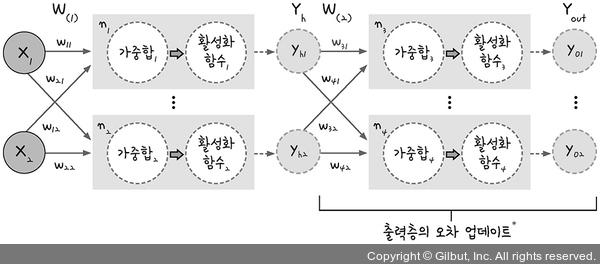

오차 역전파는 Y 값에서 거꾸로 거슬러 올라가며 가중지 W₂와 가중치 W₁이 더는 업데이트 되지 않을 때까지 반복하여 계산

먼저 W₂의 값 중 하나인 ω₃₁을 업데이트 하려면 다음 공식으로 계산해야함.

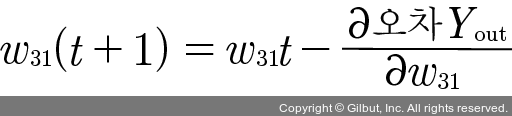

여기서 t는 한 단계 앞, t + 1은 현재 단계의 계산을 의미함. ω₃₁t는 한 단계 앞에서 이미 계산된 값을 의미하므로 여기서는 구할 필요가 없습ㄴ다. 따라서 우리가 실제로 구해야 하는 값은

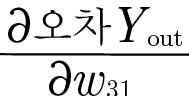입니다. 이는 오차 Y를 구하고 이를 ω₃₁에 대하여 편미분 하라는 뜻입니다.

### 오차 공식

오차 Yout 안에는 두 개(yo1, yo2)의 출력 값이 있습니다. 즉, 오차 Yout = 오차 yo1 + 오차 yo2입니다. 여기서 오차 yo1과 오차 yo2는 각각 앞서 배운 평균 제곱 오차를 이용해 구합니다. yo1, yo2의 실제 값을 yt1, yt2이라고 할 때, 다음과 같이 계산합니다.

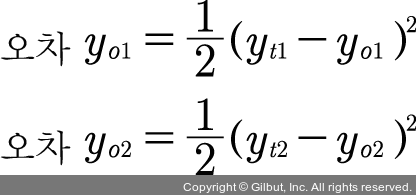

여기서 yt1, yt2에 해당하는 '실제 값'이란 데이터에서 얻어낸 yo1, yo2자리의 실제값, 즉 도출해야하는 정답 값임.

이는 계산을 통해 나오는 것이 아니라, 주어진 데이터를 통해 알 수 있느 ㄴ상수임.

계산을 통해 나오는 '출력 값'이 실제 세상을 통해 알아낸 '실제의 값'과 같아지도록 가중치 조절.

오차는 아래 식을 통해 구할 수 있음.

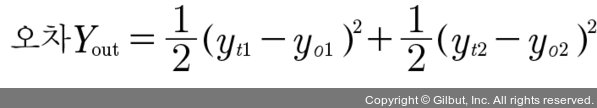

### 체인 룰

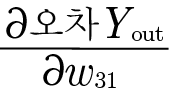의 계산은 합성 함수 미분 공식을 따름.

즉, 체인 룰(chain rule)에 의해 다음과 같이 계산할 수 있음.

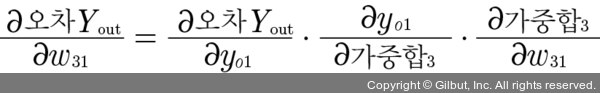

체인 룰은 연쇄 법칙이라고도 부르며, '합성 함수'를 미분할 때의 계산 공식임.

여기서 합성 함수란 함수 안에 또 다른 함수가 들어있는 것을 말함

f(x) 함수에 들어 있는 x 값이 또 다른 함수 g(x)의 결과일 때를 말함.

합성 함수는 f(g(x))와 같이 표시함. 그리고 이를 미분하면 안에 있는 g(x)를 x로 대체하여 계산한 갑소가 g(x)를 미분한 값을 거로 곱해주면 됨.

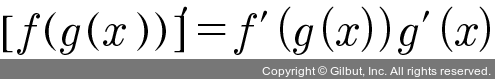

이는 다음과 같이 표현할 수 있음.

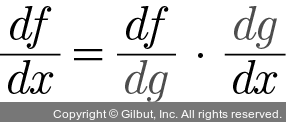

위의 식에서 dg라고 하는 항이 분모와 분자로 고리처럼 연속적으로 이어져 나오기때문에 체인룰, 즉 연쇄법칙이라고 함.

우리가 구하려는 합성 함수처럼 만일 합성 함수 식이 3개라면, 즉 f(g(h(x)))´일 때 이를 미분하면 다음과 같음.

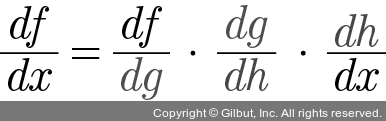

### 체인 룰 계산하기

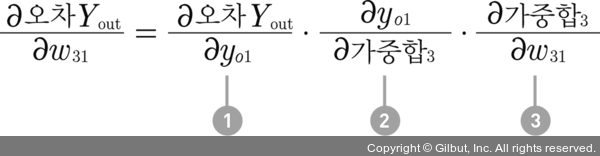

1. 앞서 '오차 공식' 절에서 설명했듯이 오차 Yout = 오차yo1 + 오차yo2 임.
2. 이를 yo1에 의해서 편미분하면 yo1과 관계없는 yo2 부분은 상수가 되어 사라지고, 남는 것은 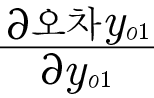임.
3. 여기서 오차 yo1은 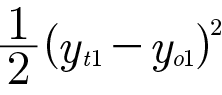이고, 이제 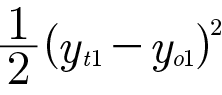를 yo1로 편미분하면 결괏값은 yo1 - yt1이 됨.

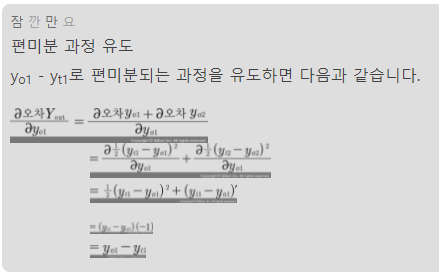


- 가중합₃이 yo1으로 바뀌는 과정에는 활성화 함수₃을 거침.
- yo1을 가중합₃에 대해 미분하라는 것은 yo1을 배출한 활성화 함수₃을 미분하라는 뜻이 됨.
- 활성화 함수에는 여러 가지가 있지만 그 중에서 시그모이드 함수를 사용함.
- 시그모이드 함수의 미분은 시그모이드 값과 그 값을 1에서 뺀 값을 곱하면 됨.
- 여기서 활성화 함수₃의 값은 yo1이고, 활성화 함수의 미분은 yo1·(1-yo1)이 됨.
- 신경망에서는 바이어스를 항상 1로 설정해 놓음. -> 바이어스는 그래프를 좌표에서 좌우로 움직이는 역할을 하는데, 활성화 함수로 사용되는 시그모이드 함수가 가장 안정된 예측을 하게 하는 바이어스 값이 1이기 때문 -> 바이어스 값을 따로 계산하지 않고 1로 처리하여 연산의 속도를 높임.
- 이를 ω₃₁에 대해 편미분하므로 ω₃₁과 관계없는 ω₃₁yh2과 바이어스 항은 모두 상수 처리로 사라짐.

이를 정리하면 다음과 같음.

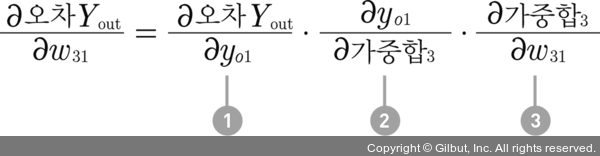

= (yo1 - yt1)·yoq(1-yo1)·yh1

### 시그모이드 함수를 미분하는 과정

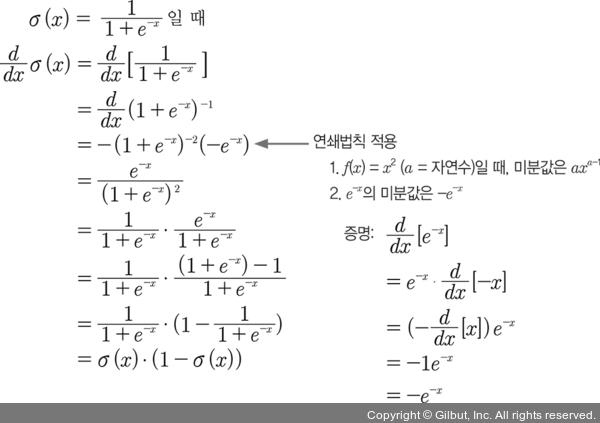

### 가중치 업데이트하기

앞서 구한 값을 ω₃₁에서 빼주면 새로운 ω₃₁값을 구할 수 있음.
따라서 출력층의 가중치를 업데이트하는 방법을 다음과 같이 정리할 수 있음.

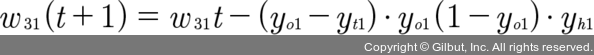

위 식에서 yh1 앞에 나오는 부분의 형태를 기억해야함.

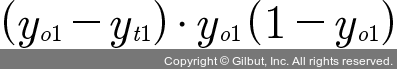

이 식을 한 번 구해 놓으면 이후는 그대로 사용해서 오차를 수할 수 있음. 이를 node3의 델타(delta)식이라고 함.

이 델타식을 δy라고 하면 우리가 해내야 하는 오차의 업데이트느 ㄴ다음과 같은 식으로도 구할 수 있음.

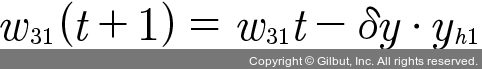

### 은닉층의 오차 업데이트 

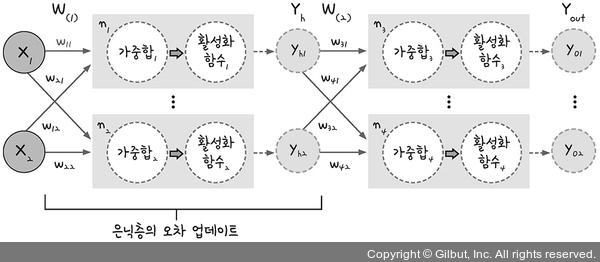

가중치에 기울기를 뺀 값을 구해야 함. 구하려는 값 ω₁₁은 다음과 같이 계산함.

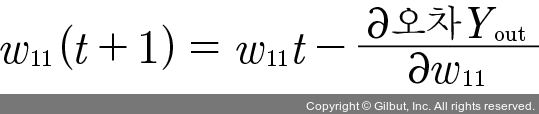

이때 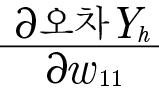가 아니라 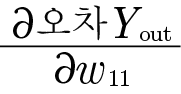임. 그 이뉴는 Yh가 은닉층 안에 위치해 잇으므로 겉으로 드러나지 않기 때문임. 따라서 그 값을 알 수 없음. 알 수 잇는 출력값은 Yout뿐이므로 은닉층의 오차 업데이트를 위한 기울기를 구할 때도 Yout에서 출발해야함.

체인룰을 적용하여 다음과 같이 계산함.
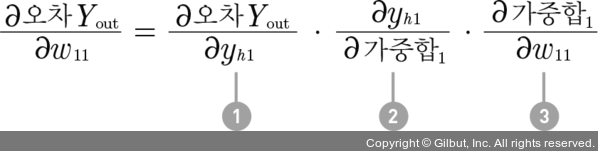

여기서 2,3항은 이정과 같은 방법으로 계산되고, 다음과 같이 바꿔줄 수 있음.

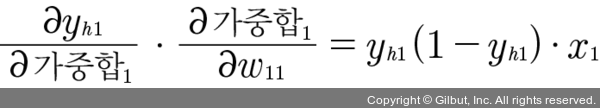

### 은닉층의 오차 계산 방법

은닉층 1항은 계산이 조금 다름.

오차 Yout 안에는 오차 yo1과 오차 yo2가 포함되어 있음.

yo1에 의해 편미분하던 이전과는 달리 yh1에 대해 미분하고, 오차yo1, 오차yo2 모두 관계가 있어 계산해야함.

계산 식은 다음과 같음.

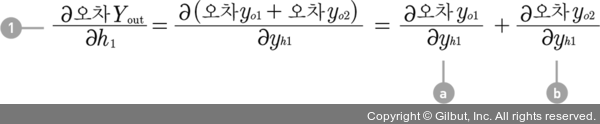

a 부분을 보면 체인룰에 의해 다음과 같이 바뀜.

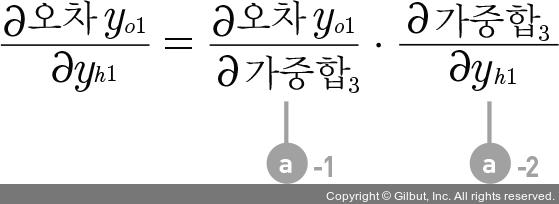

a-1을 미분하면 체인 룰에 의해 다음과 같이 바뀜.

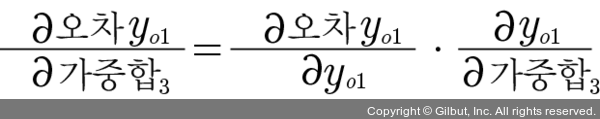

이 중 먼저 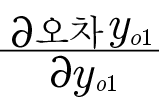에 포함된 오차 yo1은 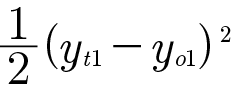이므로 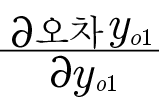을 yo1로 편미분하면 yo1 - yt1이 됨. 그리고 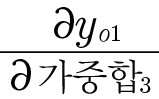는 앞서 설명한 대로 시그모이드 함수의 미분이므로 따라서 yo1 . (1 - yo1)로 계산됩니다.

이제 나머지 a-2를 미분하면 w31가 남습니다.

따라서 a-1, a-2를 정리하면 a는 다음과 같습니다.

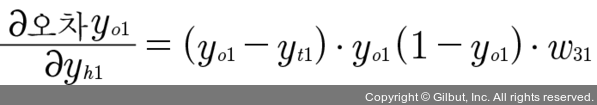

 (yo1- yo t) . yo1(1-yo1)는 델타 식(δy)의 형식이므로 다음과 같이 간단하게 표시할 수 있음.

 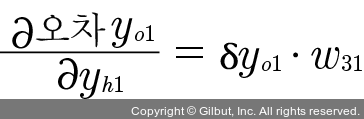

 b 부분도 체인 룰에 의해 다음과 같이 변형됨.

 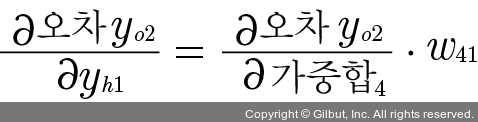

 이 중 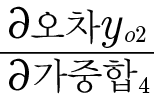 부분은 체인 룰에 의해 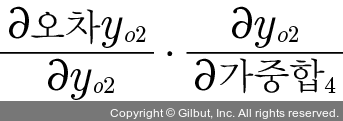로 바뀜.

 앞서 a식의 풀이에서 설명한 방식과 똑같이 적용하면 다음과 같이 표시할 수 있음.

 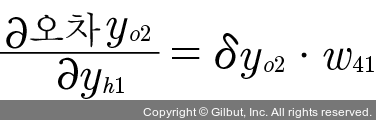

 정리하면 다음과 같음.

 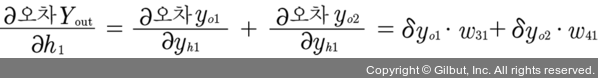

 

### 은닉층 오차 업데이트 식

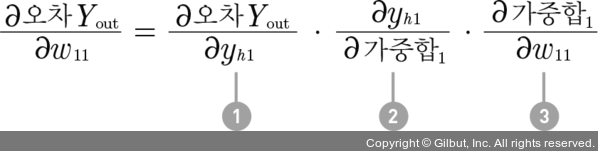

# = (δyo1·ω₃₁ + δyo2·ω₄₁)yh1(1 - yh1)·x₁

### 델타식

출력층과 은닉층의 업데이트를 위해 도출된 두 개의 식 비교

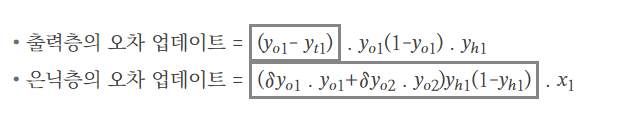

두 식 모두 오차 out(1-out)´의 형태, 즉 델타 식의 형태로 단순화 할 수 있음.

델타식이 중요한 이유는 이렇게 한 층을 거슬러 올라갈 때마다 같은 형태가 계속 나타내기 때문임. 델타식을 파악하고 나면 이를 코딩으로 설계하는 것은 어렵지 않음.

은닉층의 델타식을 δh라고 할 때, 은닉층의 가중치 업데이트 식으로 표현하면 다음과 같음.

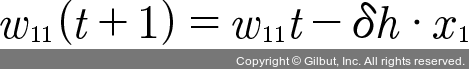